In [24]:
import pandas as pd
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
df = pd.DataFrame(df)
print(df.columns)
print(type(df))
df['bathrooms'] = df['bathrooms'].round()
df.info()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non

In [26]:
for value in df:
    print(f'For {value},{df[value].nunique()} unique values present')

For id,21436 unique values present
For date,372 unique values present
For price,4028 unique values present
For bedrooms,13 unique values present
For bathrooms,9 unique values present
For sqft_living,1038 unique values present
For sqft_lot,9782 unique values present
For floors,6 unique values present
For waterfront,2 unique values present
For view,5 unique values present
For condition,5 unique values present
For grade,12 unique values present
For sqft_above,946 unique values present
For sqft_basement,306 unique values present
For yr_built,116 unique values present
For yr_renovated,70 unique values present
For zipcode,70 unique values present
For lat,5034 unique values present
For long,752 unique values present
For sqft_living15,777 unique values present
For sqft_lot15,8689 unique values present


<Figure size 1000x600 with 0 Axes>

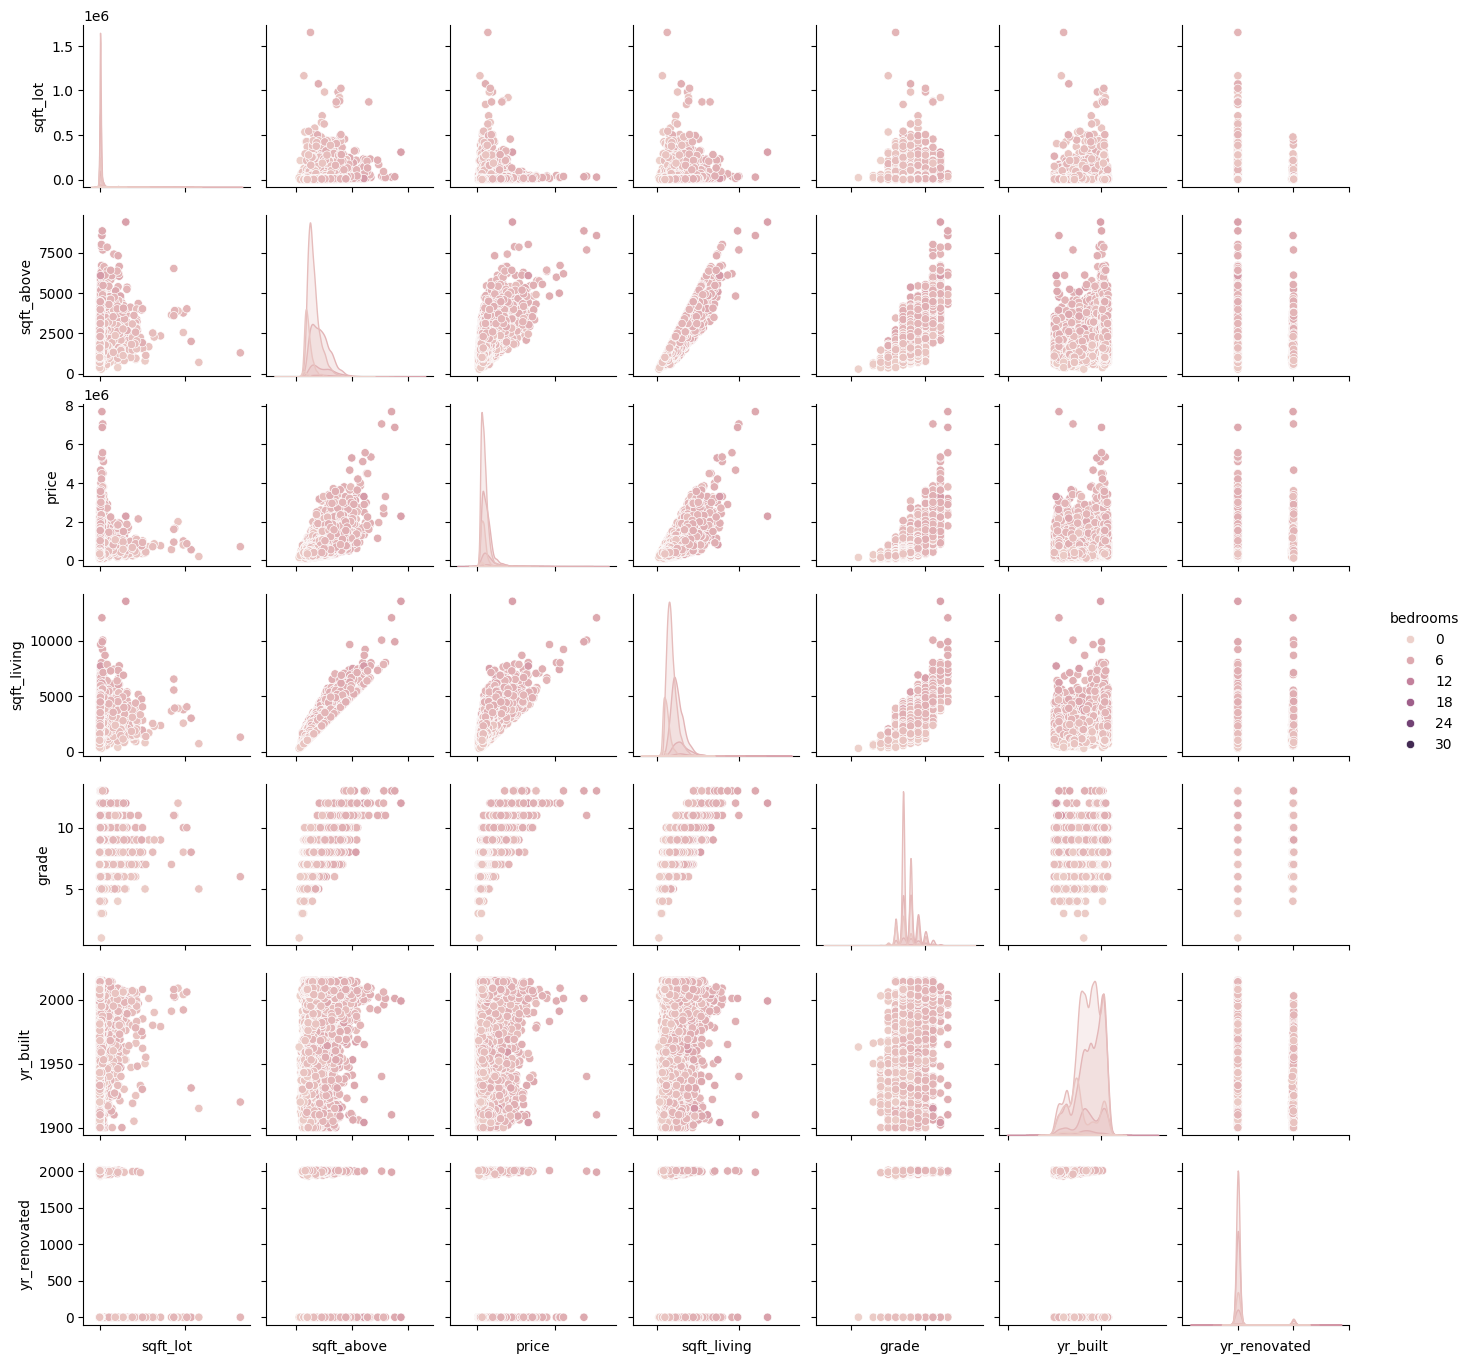

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(df[['sqft_lot','sqft_above','price','sqft_living','bedrooms','grade','yr_built','yr_renovated']]
                 ,hue='bedrooms',size=2)
g.set(xticklabels=[])

#Hides warnings when running locally
import warnings
warnings.filterwarnings('ignore')

In [28]:
df1 = df.drop(columns=['id', 'date', 'lat', 'long'], axis='columns')
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [29]:
from sklearn.model_selection import train_test_split

time = []
for i in df['yr_renovated']:
    if i == 0:
        time.append(0)
    else:
        a = 2015-int(i) #base year of the data is 2015
        time.append(a)

df1['years_since_last_renovation'] = time


built = []
for i in df['yr_built']:
    a = 2015 - int(i)
    built.append(a)

df1['age'] = built

x = df1.drop(['price', 'yr_renovated', 'yr_built', 'sqft_above', 'sqft_living15'], axis='columns')
y = df1['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69)

df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: >

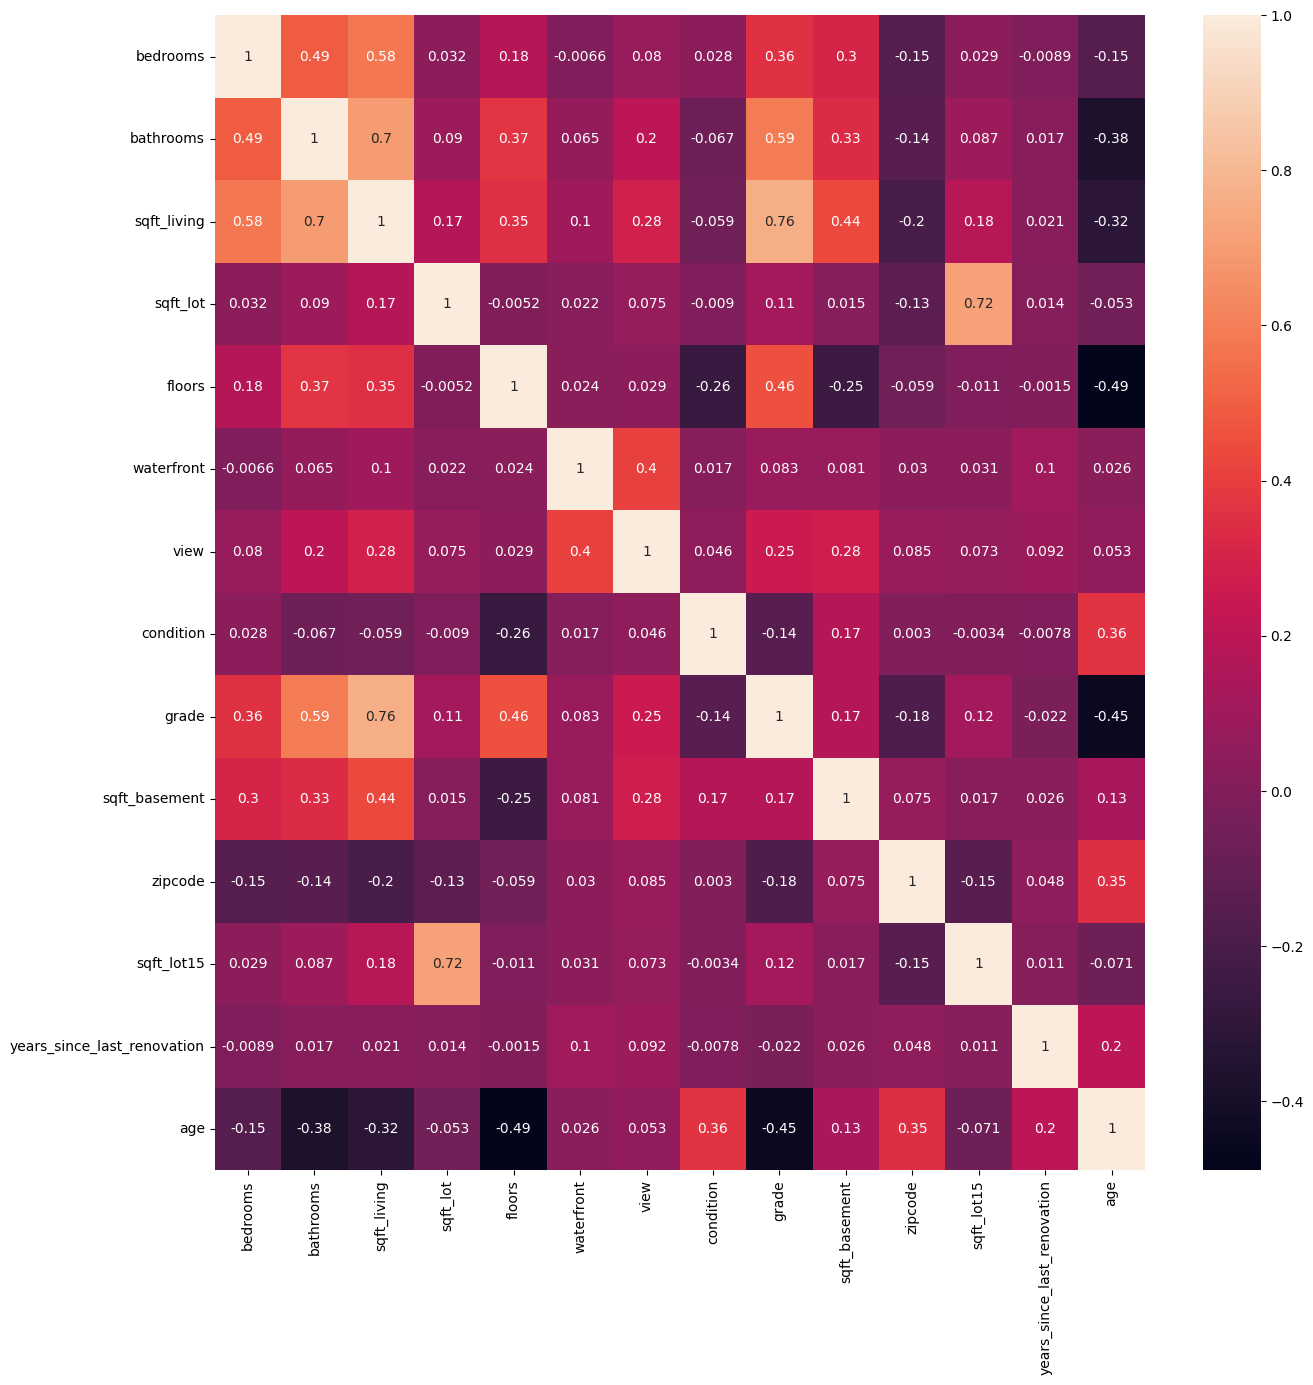

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(x.corr(),annot=True)

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=None)
pca.fit(x_scaled)

# Access the loadings (components_ attribute)
loadings = pca.components_

# Create a DataFrame for better readability
loadings_df = pd.DataFrame(loadings, columns=x.columns, 
                           index=[f'PC{i+1}' for i in range(loadings.shape[0])])

# To see the importance for the first principal component (PC1):
print("Loadings for PC1:")
print(loadings_df.loc['PC1'].abs().sort_values(ascending=False)) 
X_pca = pca.fit_transform(x_scaled)

Loadings for PC1:
sqft_living                    0.473180
grade                          0.440047
bathrooms                      0.428803
bedrooms                       0.319763
age                            0.297958
floors                         0.280534
sqft_basement                  0.169058
view                           0.164307
zipcode                        0.159689
sqft_lot15                     0.129298
sqft_lot                       0.125698
condition                      0.098976
waterfront                     0.072937
years_since_last_renovation    0.012178
Name: PC1, dtype: float64


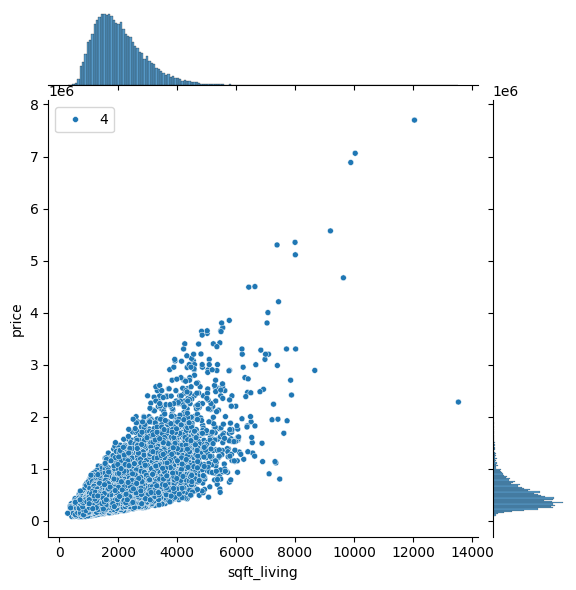

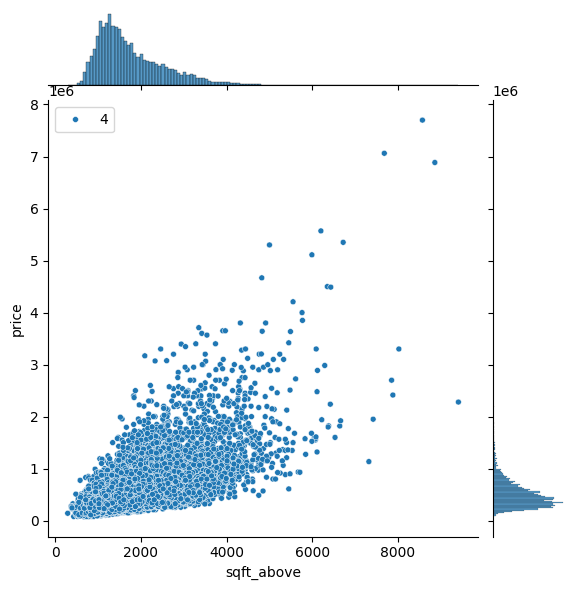

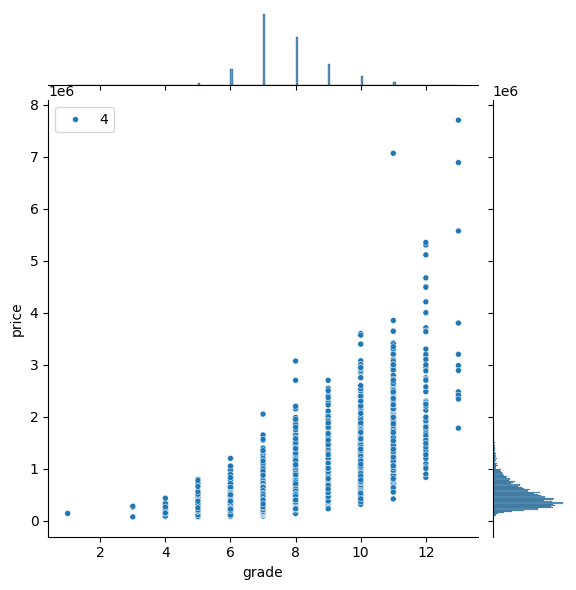

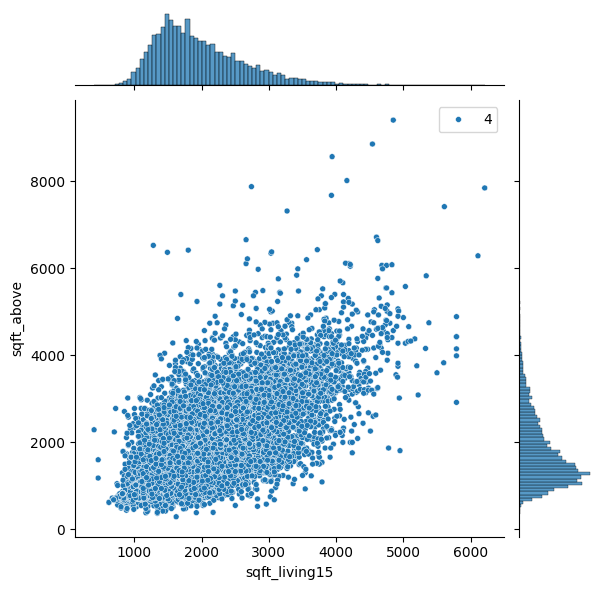

In [32]:
sns.jointplot(x='sqft_living',y='price',data=df1,kind='scatter',size=4)
sns.jointplot(x='sqft_above',y='price',data=df1,kind='scatter',size=4)
sns.jointplot(x='grade',y='price',data=df1,kind='scatter',size=4)
sns.jointplot(x='sqft_living15',y='sqft_above',data=df1,kind='scatter',size=4)

In [33]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(n_estimators=100, random_state=69)
rfr.fit(x_train, y_train)
rfr.score(x_train, y_train)

0.9728891099927566

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfr, x, y, cv=5, scoring='r2')

print(f"Scores for each fold: {scores}")
print(f"Average score: {scores.mean()}")

#Hiding warnings once again
import warnings
warnings.filterwarnings('ignore')

Scores for each fold: [0.81918811 0.81501167 0.82218508 0.81347964 0.80252257]
Average score: 0.8144774169943967


In [35]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,sqft_lot15,years_since_last_renovation,age
0,3,1.0,1180,5650,1.0,0,0,3,7,0,98178,5650,0,60
1,3,2.0,2570,7242,2.0,0,0,3,7,400,98125,7639,24,64
2,2,1.0,770,10000,1.0,0,0,3,6,0,98028,8062,0,82
3,4,3.0,1960,5000,1.0,0,0,5,7,910,98136,5000,0,50
4,3,2.0,1680,8080,1.0,0,0,3,8,0,98074,7503,0,28


In [36]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.0,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
